In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sbn

#used to check for stationarity in the time series
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import linregress

In [2]:
def check_stationarity(series, alpha, diff):

    # h_0 is that the series has a unit root-> if so, likely non-stationarity
    result_adf = adfuller(series)
    p_val = result_adf[1]
    if p_val < alpha:
        # reject, likely stationary
        print("ADF test: p-val=", p_val, "-> Conclusion: likely stationary")
    else:
        print("ADF test: p-val=", p_val, "-> Conclusion: likely has a trend")

    # print("----------------------------------------------------------------")

    # result_kpss = kpss(diff)
    # p_val = result_kpss[1]
    # if p_val > alpha:
    #     # reject, likely stationary
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely stationary")
    # else:
    #     print("KPSS test: p-val=", p_val, "-> Conclusion: likely has a trend")

    return result_adf[1]

In [3]:
def methodology(stk1, stk2):
    diff = stk1["Adj Close"] - stk2["Adj Close"]

    time = np.arange(len(diff))
    reg = linregress(time, diff)
    line = reg.intercept + reg.slope*time
    new_series = diff - line

    return check_stationarity(new_series, 0.05, diff)

In [4]:
def download_data(stk):

    # start date because of moderna listing in 2018 December and yfinance data delay

    start_date = "2019-01-01"
    end_date = "2023-01-01"

    stk_data = yf.download(stk,start=start_date,end=end_date)

    return stk_data

In [5]:
# Will plot 2 things

# universe = ["MSFT", "MRNA",]

# stk_data = []
# for stk in universe:
#     stk_data.append(download_data(stk))

# plt.figure()
# for x in stk_data:
#     plt.plot(x["Adj Close"], label="stk1")

# plt.legend()
# plt.title("stks Price Plot")
# plt.show()

In [6]:
# Obtain Data
universe = ["AAPL","AAL","AMD","AMGN","AMZN","BA","BABA","BAC","C","CAT","COST","CSCO","CVX","DIS","DLR","EQIX","F","GM","GOOGL","GS","IBM","INTC","JNJ","JPM","KO","LMT","LULU","META","MPC","MRK","MRNA","MSFT","MU","NFLX","NKE","NVDA","PFE","TSLA","VZ","WFC","WM","XOM","SCHW","RIOT",]

stk_data = []
for stk in universe:
    stk_data.append(download_data(stk))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

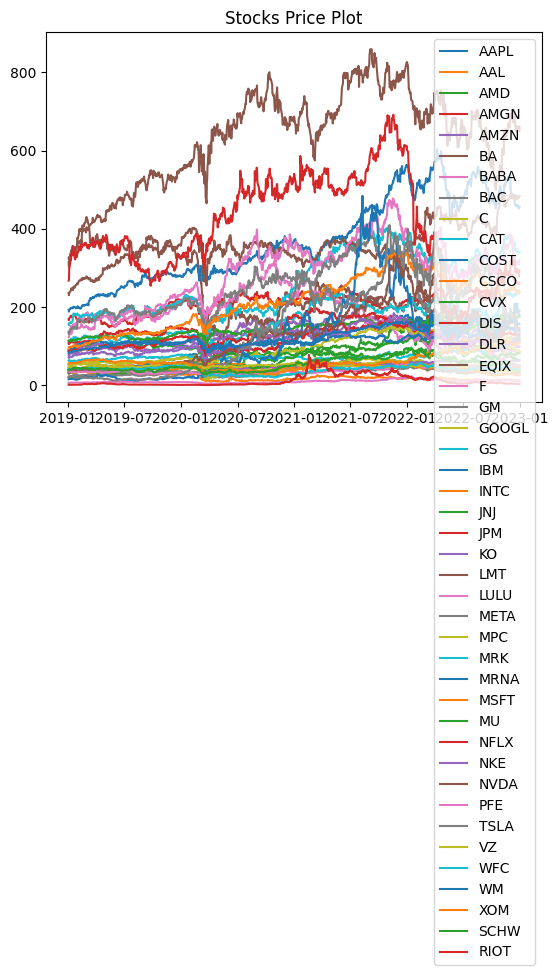

In [7]:
plt.figure()
i = 0
for x in stk_data:
    plt.plot(x["Adj Close"], label=universe[i])
    i+=1

plt.legend()
plt.title("Stocks Price Plot")
plt.savefig('Stock Prices.png', dpi = 1500)
plt.show()

In [8]:
# initialize cov-matrix
data = np.random.rand(len(universe), len(universe))
stockNum = len(universe)

# Calculate the stationary properties
cov = np.zeros((stockNum, stockNum))
for i in range(stockNum):
    for j in range(stockNum):
        if (i == j):
            data[i,j] = 1
        else:
            print(universe[i]+universe[j])
            
            data[i,j] = methodology(stk_data[i],stk_data[j])

AAPLAAL
ADF test: p-val= 0.6708070538518025 -> Conclusion: likely has a trend
AAPLAMD
ADF test: p-val= 0.005470277942468958 -> Conclusion: likely stationary
AAPLAMGN
ADF test: p-val= 0.457614597197328 -> Conclusion: likely has a trend
AAPLAMZN
ADF test: p-val= 0.29316984801700136 -> Conclusion: likely has a trend
AAPLBA
ADF test: p-val= 0.4342793368683253 -> Conclusion: likely has a trend
AAPLBABA
ADF test: p-val= 0.19161632551594981 -> Conclusion: likely has a trend
AAPLBAC
ADF test: p-val= 0.44154910308630063 -> Conclusion: likely has a trend
AAPLC
ADF test: p-val= 0.42126057057418187 -> Conclusion: likely has a trend
AAPLCAT
ADF test: p-val= 0.2974885176026718 -> Conclusion: likely has a trend
AAPLCOST
ADF test: p-val= 0.028197848295831794 -> Conclusion: likely stationary
AAPLCSCO
ADF test: p-val= 0.6764105461852659 -> Conclusion: likely has a trend
AAPLCVX
ADF test: p-val= 0.8975491409086034 -> Conclusion: likely has a trend
AAPLDIS
ADF test: p-val= 0.25006589116149247 -> Conclusio

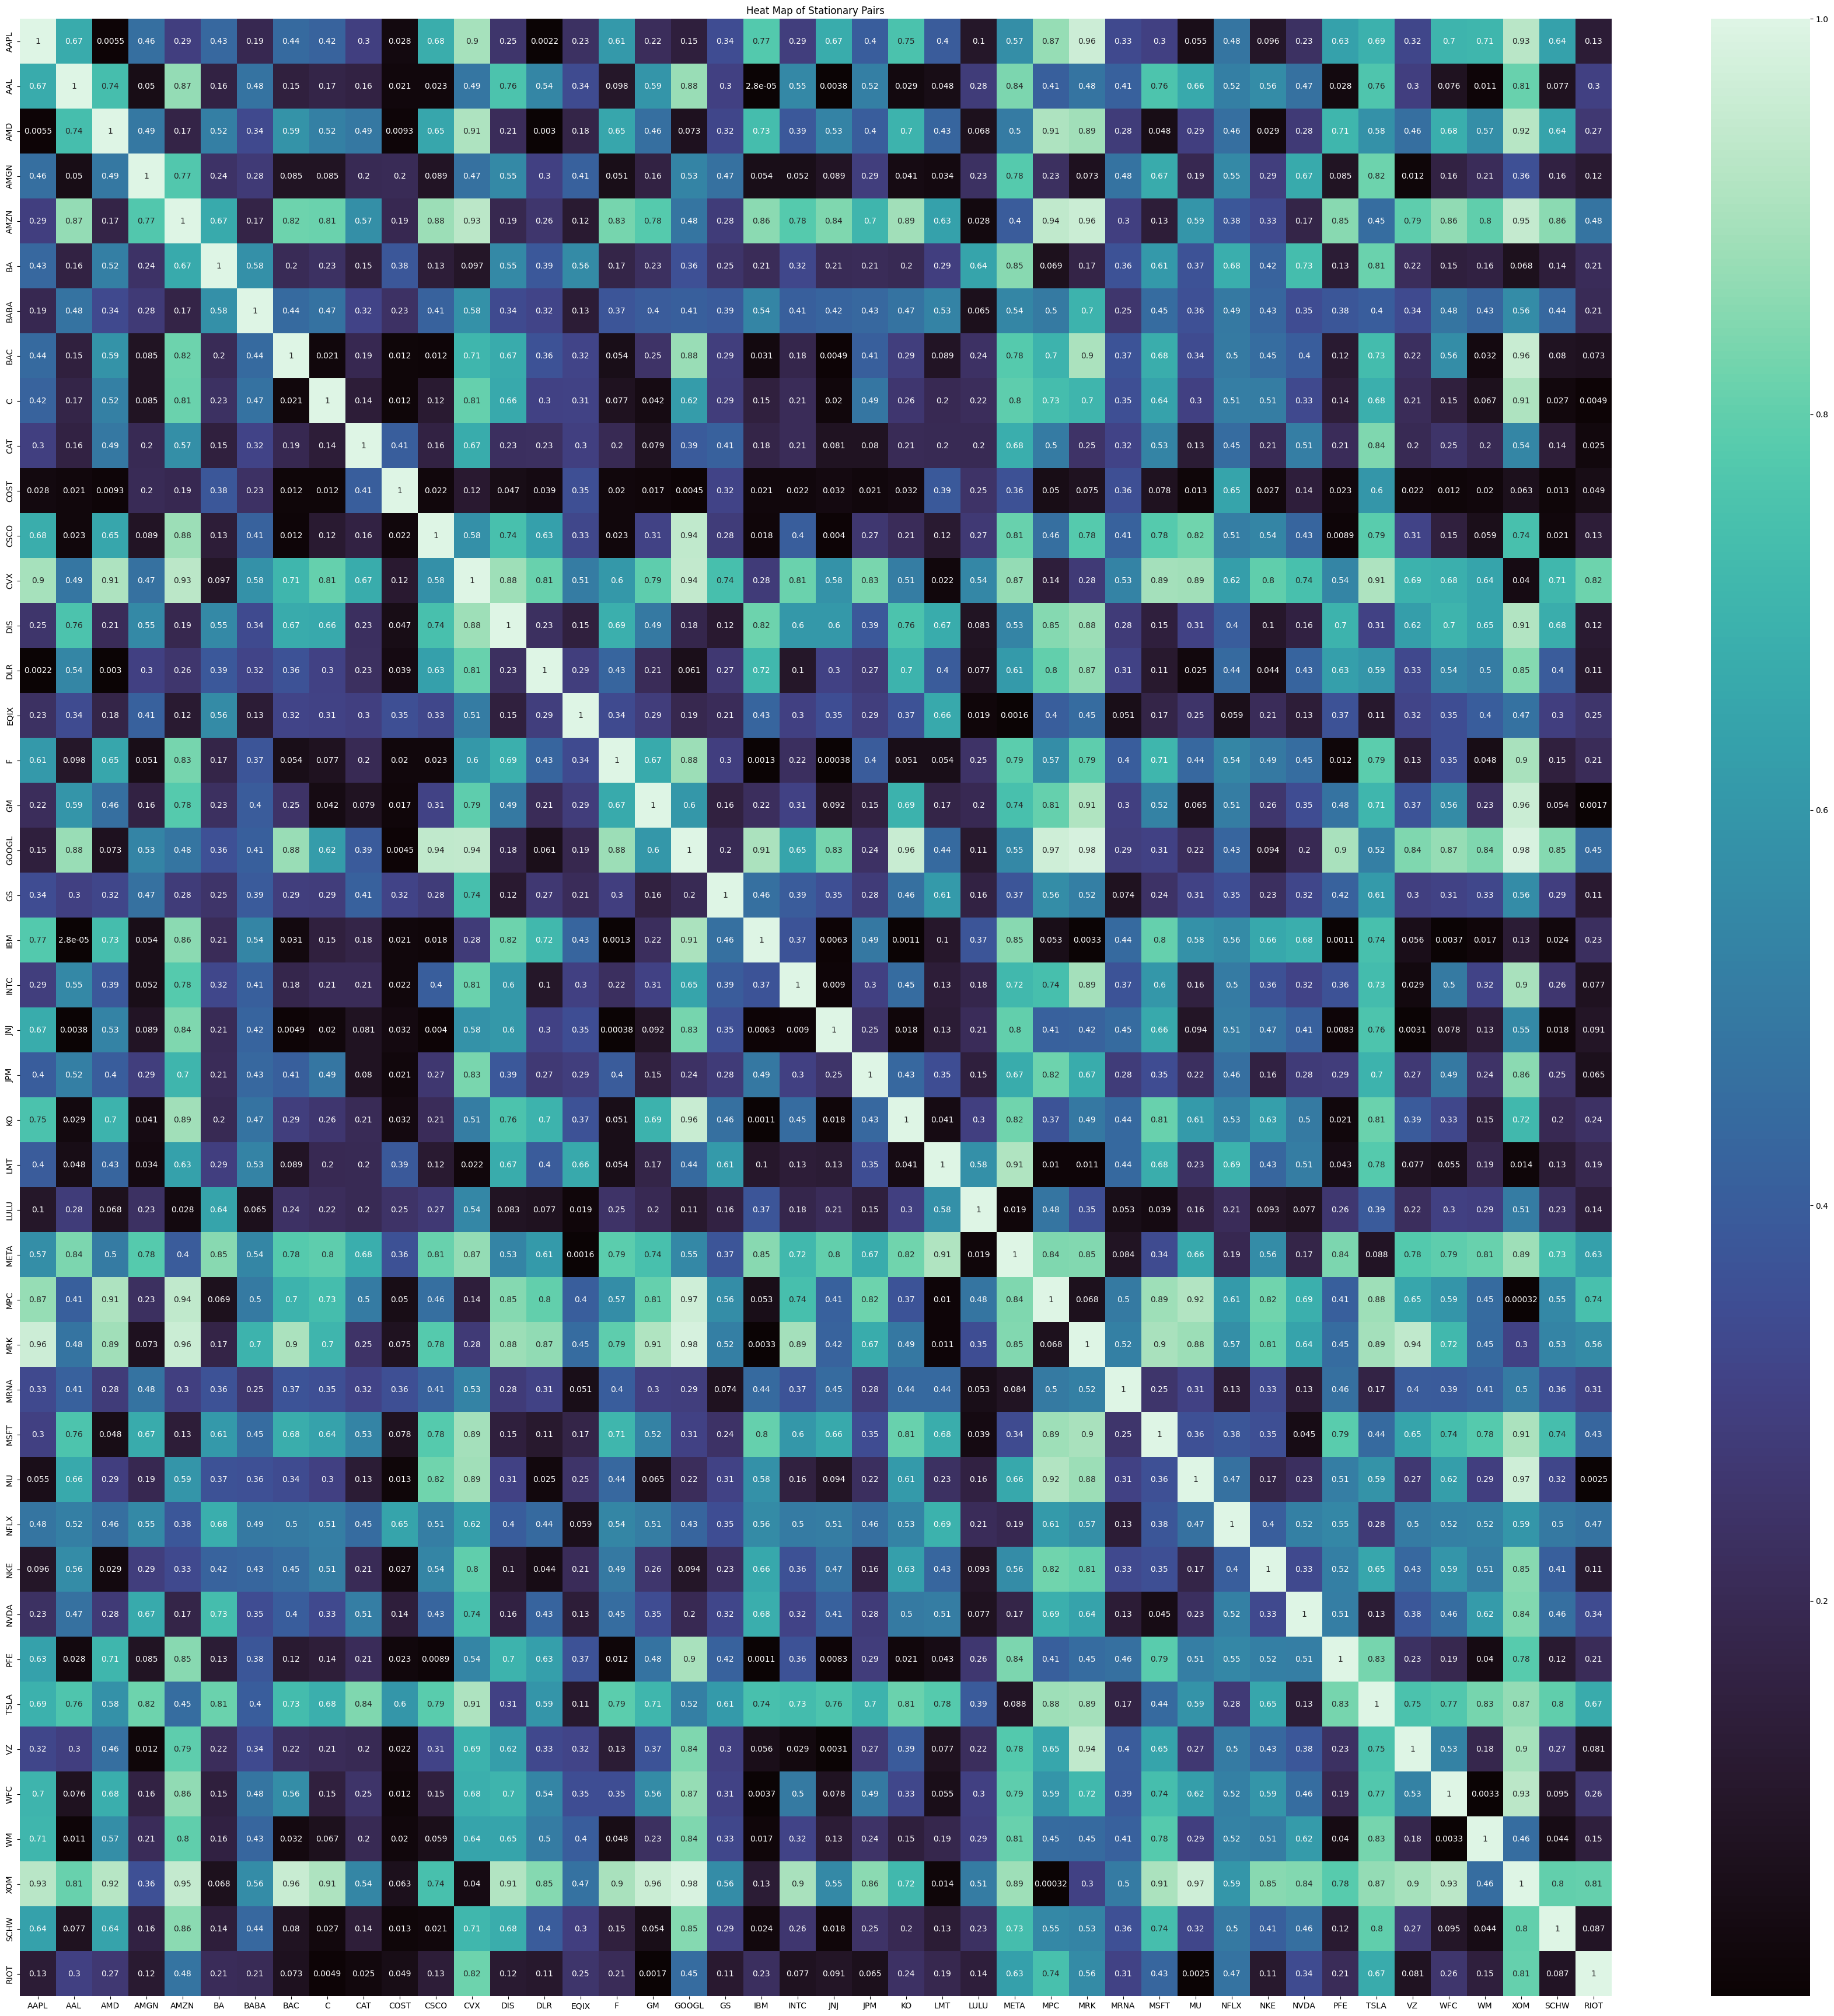

<Figure size 7680x5760 with 0 Axes>

In [9]:
# Create a heatmap using Matplotlib
plt.figure(figsize=(stockNum, stockNum))
heat_map = sbn.heatmap(data, xticklabels=universe, yticklabels=universe, annot=True, cmap="mako")
plt.title("Heat Map of Stationary Pairs")
plt.figure(dpi=1200)
plt.show()

In [10]:
data

array([[1.        , 0.67080705, 0.00547028, ..., 0.92762755, 0.63579284,
        0.13275645],
       [0.67080705, 1.        , 0.7360633 , ..., 0.80864447, 0.07732306,
        0.30406895],
       [0.00547028, 0.7360633 , 1.        , ..., 0.92284156, 0.64431724,
        0.26918056],
       ...,
       [0.92762755, 0.80864447, 0.92284156, ..., 1.        , 0.80161448,
        0.80807552],
       [0.63579284, 0.07732306, 0.64431724, ..., 0.80161448, 1.        ,
        0.08734292],
       [0.13275645, 0.30406895, 0.26918056, ..., 0.80807552, 0.08734292,
        1.        ]])

In [11]:
df = pd.DataFrame(data = data)
df.columns = universe

print("Data Frame")
print(df)
print()

# Get data below diagonal and sort
sol = (df.where(np.triu(np.ones(df.shape), k=1).astype(bool)).stack().sort_values(ascending=False).reset_index())

# Dict comprehension
mapping = {i: universe[i] for i in range(len(universe))}

# Replace numbers in column 'A' with the corresponding index string
sol['level_0'] = sol['level_0'].map(mapping)

Data Frame
        AAPL       AAL       AMD      AMGN      AMZN        BA      BABA   
0   1.000000  0.670807  0.005470  0.457615  0.293170  0.434279  0.191616  \
1   0.670807  1.000000  0.736063  0.049524  0.869426  0.161283  0.475252   
2   0.005470  0.736063  1.000000  0.489934  0.170024  0.518994  0.335757   
3   0.457615  0.049524  0.489934  1.000000  0.773044  0.240088  0.276014   
4   0.293170  0.869426  0.170024  0.773044  1.000000  0.665372  0.170539   
5   0.434279  0.161283  0.518994  0.240088  0.665372  1.000000  0.577225   
6   0.191616  0.475252  0.335757  0.276014  0.170539  0.577225  1.000000   
7   0.441549  0.151790  0.588367  0.085310  0.820065  0.203561  0.444913   
8   0.421261  0.172412  0.522979  0.084931  0.814925  0.233672  0.471879   
9   0.297489  0.162110  0.491283  0.202571  0.571461  0.149998  0.315280   
10  0.028198  0.021190  0.009274  0.203946  0.193619  0.379132  0.234918   
11  0.676411  0.022630  0.654871  0.089279  0.881295  0.132947  0.414938   
1

In [12]:
print(sol)
print()
n = 10
print(f"last {n} rows")
print()
print(sol.tail(n))

    level_0 level_1         0
0     GOOGL     XOM  0.984566
1     GOOGL     MRK  0.981332
2        MU     XOM  0.968100
3     GOOGL     MPC  0.965191
4      AAPL     MRK  0.963464
..      ...     ...       ...
941     IBM      KO  0.001116
942     IBM     PFE  0.001058
943       F     JNJ  0.000384
944     MPC     XOM  0.000324
945     AAL     IBM  0.000028

[946 rows x 3 columns]

last 10 rows

    level_0 level_1         0
936      MU    RIOT  0.002508
937    AAPL     DLR  0.002185
938      GM    RIOT  0.001720
939    EQIX    META  0.001554
940       F     IBM  0.001344
941     IBM      KO  0.001116
942     IBM     PFE  0.001058
943       F     JNJ  0.000384
944     MPC     XOM  0.000324
945     AAL     IBM  0.000028
